–ê–Ω–∞—Å—Ç–∞—Å–∏—è –ü–ª–∞–≤–∏–Ω–∞

## –ú–æ–¥–µ–ª—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–µ–≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∫–ª–∏–µ–Ω—Ç–æ–º –¥–æ–ª–≥–æ–≤—ã—Ö –æ–±—è–∑–∞—Ç–µ–ª—å—Å—Ç–≤

**–¶–µ–ª—å –ø—Ä–æ–µ–∫—Ç–∞**: –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–µ–≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –¥–æ–ª–≥–æ–≤—ã—Ö –æ–±—è–∑–∞—Ç–µ–ª—å—Å—Ç–≤ –∫–ª–∏–µ–Ω—Ç–æ–º –ø–æ —Ç–µ–∫—É—â–µ–º—É –∫—Ä–µ–¥–∏—Ç—É –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥–∞–Ω–Ω—ã—Ö –æ –∫–ª–∏–µ–Ω—Ç–µ –±–∞–Ω–∫–∞.

**–ú–µ—Ç—Ä–∏–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞**: F1-score - –º–µ—Ç—Ä–∏–∫–∞, –ø–æ–∫–∞–∑—ã–≤–∞—é—â–∞—è –≥–∞—Ä–º–æ–Ω–∏—á–µ—Å–∫–æ–µ —Å—Ä–µ–¥–Ω–µ–µ –º–µ–∂–¥—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏ precision –∏ recall. –í –∫–∞—á–µ—Å—Ç–≤–µ baseline –ø—Ä–∏–Ω–∏–º–∞–µ—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏–µ 0.5

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
from sklearn.metrics import f1_score, precision_recall_curve, plot_precision_recall_curve, classification_report, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import Pool

from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint

%matplotlib inline

### 1. –û–±–∑–æ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞

**–¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è**
* **Credit Default** - —Ñ–∞–∫—Ç –Ω–µ–≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∫—Ä–µ–¥–∏—Ç–Ω—ã—Ö –æ–±—è–∑–∞—Ç–µ–ª—å—Å—Ç–≤ (0 - –ø–æ–≥–∞—à–µ–Ω –≤–æ–≤—Ä–µ–º—è, 1 - –ø—Ä–æ—Å—Ä–æ—á–∫–∞)



**–ù–µ–∑–∞–≤–∏—Å–∏–º—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ:**
* **Home Ownership** - –¥–æ–º–æ–≤–ª–∞–¥–µ–Ω–∏–µ
* **Annual Income** - –≥–æ–¥–æ–≤–æ–π –¥–æ—Ö–æ–¥
* **Years in current job** - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–µ—Ç –Ω–∞ —Ç–µ–∫—É—â–µ–º –º–µ—Å—Ç–µ —Ä–∞–±–æ—Ç—ã
* **Tax Liens** - –Ω–∞–ª–æ–≥–æ–≤—ã–µ –æ–±—Ä–µ–º–µ–Ω–µ–Ω–∏—è
* **Number of Open Accounts** - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∫—Ä—ã—Ç—ã—Ö —Å—á–µ—Ç–æ–≤
* **Years of Credit History** - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–µ—Ç –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∏—Å—Ç–æ—Ä–∏–∏
* **Maximum Open Credit** - –Ω–∞–∏–±–æ–ª—å—à–∏–π –æ—Ç–∫—Ä—ã—Ç—ã–π –∫—Ä–µ–¥–∏—Ç
* **Number of Credit Problems** - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–±–ª–µ–º —Å –∫—Ä–µ–¥–∏—Ç–æ–º
* **Months since last delinquent** - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –º–µ—Å—è—Ü–µ–≤ —Å –ø–æ—Å–ª–µ–¥–Ω–µ–π –ø—Ä–æ—Å—Ä–æ—á–∫–∏ –ø–ª–∞—Ç–µ–∂–∞
* **Bankruptcies** - –±–∞–Ω–∫—Ä–æ—Ç—Å—Ç–≤–∞
* **Purpose** - —Ü–µ–ª—å –∫—Ä–µ–¥–∏—Ç–∞
* **Term** - —Å—Ä–æ–∫ –∫—Ä–µ–¥–∏—Ç–∞
* **Current Loan Amount** - —Ç–µ–∫—É—â–∞—è —Å—É–º–º–∞ –∫—Ä–µ–¥–∏—Ç–∞
* **Current Credit Balance** - —Ç–µ–∫—É—â–∏–π –∫—Ä–µ–¥–∏—Ç–Ω—ã–π –±–∞–ª–∞–Ω—Å
* **Monthly Debt** - –µ–∂–µ–º–µ—Å—è—á–Ω—ã–π –¥–æ–ª–≥
* **Credit Score** - –æ—Ü–µ–Ω–∫–∞ –∫—Ä–µ–¥–∏—Ç–æ—Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏


### 2. –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [2]:
train_path = 'course_project_train.csv'
test_path = 'course_project_test.csv'

In [3]:
df = pd.read_csv(train_path)
df.head(1)

Home Ownership  Annual Income Years in current job  Tax Liens  \
0       Own Home       482087.0                  NaN        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0                           NaN           1.0   

              Purpose        Term  Current Loan Amount  \
0  debt consolidation  Short Term           99999999.0   

   Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
0                 47386.0        7914.0         749.0               0

In [4]:
df.shape

(7500, 17)

In [5]:
df.describe()

Annual Income    Tax Liens  Number of Open Accounts  \
count   5.943000e+03  7500.000000              7500.000000   
mean    1.366392e+06     0.030133                11.130933   
std     8.453392e+05     0.271604                 4.908924   
min     1.645970e+05     0.000000                 2.000000   
25%     8.443410e+05     0.000000                 8.000000   
50%     1.168386e+06     0.000000                10.000000   
75%     1.640137e+06     0.000000                14.000000   
max     1.014934e+07     7.000000                43.000000   

       Years of Credit History  Maximum Open Credit  \
count              7500.000000         7.500000e+03   
mean                 18.317467         9.451537e+05   
std                   7.041946         1.602622e+07   
min                   4.000000         0.000000e+00   
25%                  13.500000         2.792295e+05   
50%                  17.000000         4.781590e+05   
75%                  21.800000         7.935015e+05   
max                  57.700000         1.304726e+09   

       Number of Credit Problems  Months since last delinquent  Bankruptcies  \
count                7500.000000                   3419.000000   7486.000000   
mean                    0.170000                     34.692600      0.117152   
std                     0.498598                     21.688806      0.347192   
min                     0.000000                      0.000000      0.000000   
25%                     0.000000                     16.000000      0.000000   
50%                     0.000000                     32.000000      0.000000   
75%                     0.000000                     50.000000      0.000000   
max                     7.000000                    118.000000      4.000000   

       Current Loan Amount  Current Credit Balance   Monthly Debt  \
count         7.500000e+03            7.500000e+03    7500.000000   
mean          1.187318e+07            2.898332e+05   18314.454133   
std           3.192612e+07            3.178714e+05   11926.764673   
min           1.124200e+04            0.000000e+00       0.000000   
25%           1.801690e+05            1.142565e+05   10067.500000   
50%           3.095730e+05            2.093230e+05   16076.500000   
75%           5.198820e+05            3.604062e+05   23818.000000   
max           1.000000e+08            6.506797e+06  136679.000000   

       Credit Score  Credit Default  
count   5943.000000     7500.000000  
mean    1151.087498        0.281733  
std     1604.451418        0.449874  
min      585.000000        0.000000  
25%      711.000000        0.000000  
50%      731.000000        0.000000  
75%      743.000000        1.000000  
max     7510.000000        1.000000

### 3. –û–±–∑–æ—Ä —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π

In [6]:
target_name = 'Credit Default'
features_names = df.columns.drop(target_name).tolist()

–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
0 (–ø–æ–≥–∞—à–µ–Ω–∏–µ) - 72%
1 (–ø—Ä–æ—Å—Ä–æ—á–∫–∞) - 28%


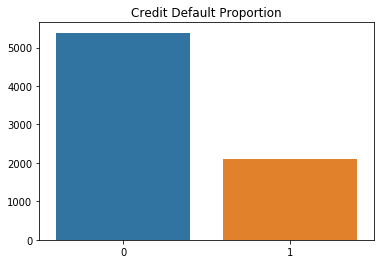

In [7]:
counts = df[target_name].value_counts()

print('–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π')
print(f'0 (–ø–æ–≥–∞—à–µ–Ω–∏–µ) - {counts[0]/df.shape[0]*100:.0f}%')
print(f'1 (–ø—Ä–æ—Å—Ä–æ—á–∫–∞) - {counts[1]/df.shape[0]*100:.0f}%')


plt.figure(figsize=(6,4))    
plt.title('Credit Default Proportion')
sns.barplot(counts.index, counts.values)
plt.show()

### 4. –û–±–∑–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [8]:
df.dtypes

Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
dtype: object

In [9]:
target_name = 'Credit Default'
cat_feature_names = ['Home Ownership', 'Years in current job', 'Bankruptcies', 'Number of Credit Problems', 
                     'Purpose', 'Term', 'Tax Liens']

num_feature_names = ['Annual Income','Number of Open Accounts','Years of Credit History', 
                     'Maximum Open Credit','Months since last delinquent',
                     'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', 'Credit Score']

#### 4.1 –ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************



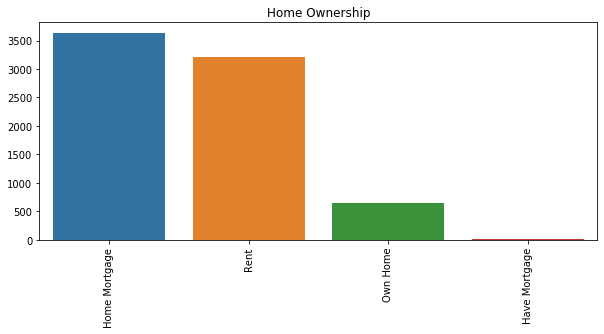

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************



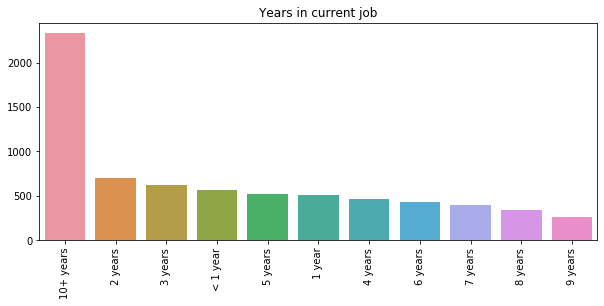

Bankruptcies

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64
****************************************************************************************************



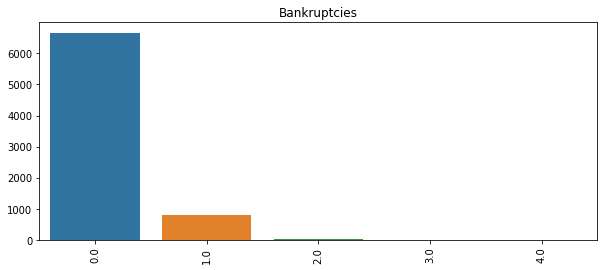

Number of Credit Problems

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64
****************************************************************************************************



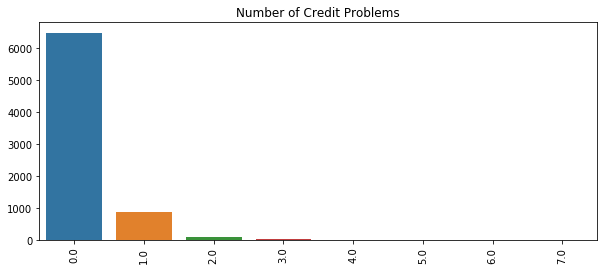

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64
****************************************************************************************************



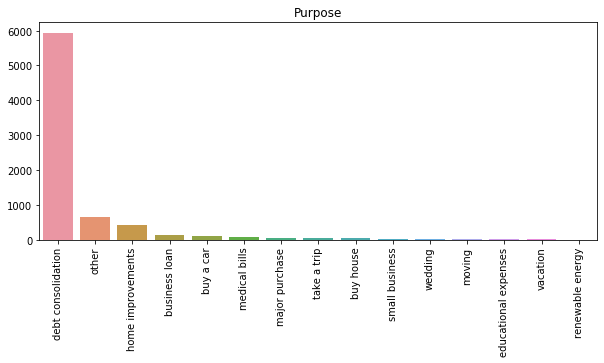

Term

Short Term    5556
Long Term     1944
Name: Term, dtype: int64
****************************************************************************************************



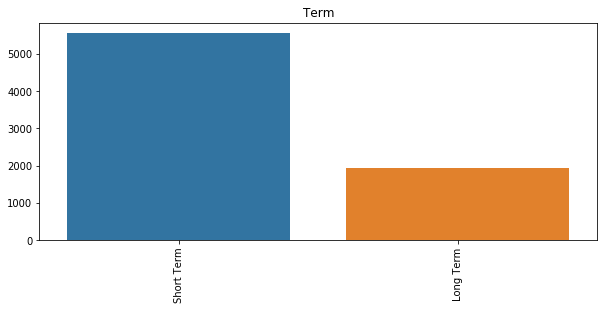

Tax Liens

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64
****************************************************************************************************



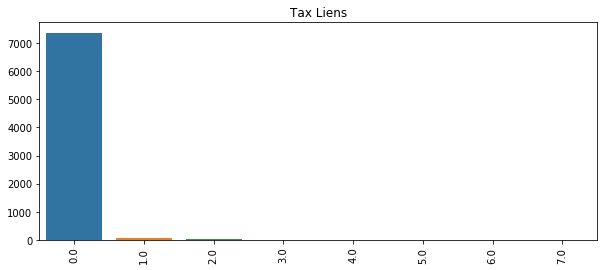

In [10]:
for cat_colname in cat_feature_names:
    print(str(cat_colname) + '\n\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')
    counts = df[cat_colname].value_counts()
    plt.figure(figsize=(10,4))    
    plt.title(cat_colname)
    plt.xticks(rotation=90)
    sns.barplot(counts.index, counts.values)
    plt.show()

#### 4.2. –ö–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

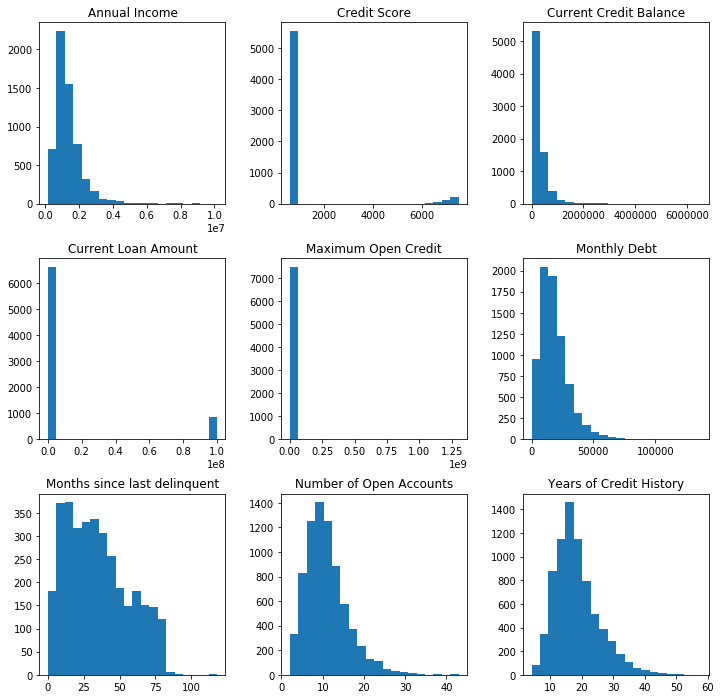

In [11]:
df[num_feature_names].hist(figsize=(12,12), bins=20, grid=False)
plt.show()

#### 4.3. –û–±–∑–æ—Ä –ø—Ä–æ–ø—É—Å–∫–æ–≤

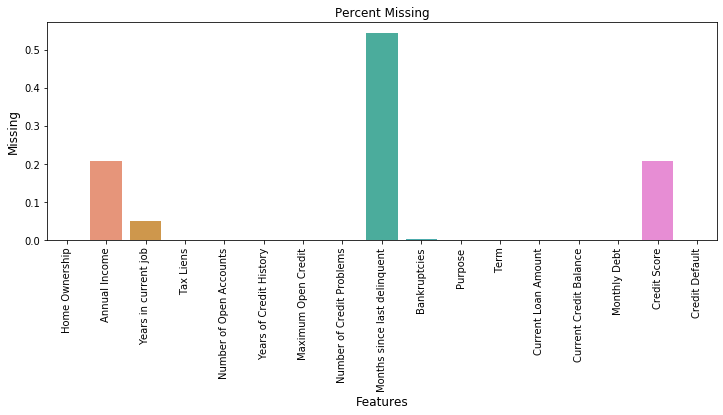

In [12]:
nan_df = (df.isna().sum() / df.shape[0]).reset_index()
nan_df.columns=['feature', 'nan_percent']

plt.figure(figsize=(12,4))
sns.barplot(nan_df['feature'], nan_df['nan_percent'])
plt.title('Percent Missing')
plt.ylabel('Missing', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

### 5. –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∏ –≤—ã–±—Ä–æ—Å–æ–≤

In [13]:
class FeatureImputer:
    """–ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∏ –æ–±—Ä–∞–±–æ—Ç–∫–∞ –≤—ã–±—Ä–æ—Å–æ–≤"""
    
    def __init__(self):
        self.medians=None
        self.modes=None
        
    def fit(self, X):
        # –∑–∞–¥–∞–µ–º –º–µ–¥–∏–∞–Ω—ã –ø–æ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º—É –¥–∞—Ç–∞—Å–µ—Ç—É X
        self.medians = X.median()
        self.modes = X.mode()
            
    def transform(self, X):
        
        ## –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤
        # –¥–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤, —É –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ –±—ã–ª–æ –ø—Ä–æ–±–ª–µ–º –ø–æ –∫—Ä–µ–¥–∏—Ç—É, –∑–∞–ø–æ–ª–Ω—è–µ–º –Ω–∞ -1 –ø—Ä–æ–ø—É—Å–∫–∏ –≤ Months since last delinquent
        # –∑–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ Bankruptcies –Ω—É–ª—è–º–∏, –µ—Å–ª–∏ –Ω–µ –±—ã–ª–æ –ø—Ä–æ–±–ª–µ–º –ø–æ –∫—Ä–µ–¥–∏—Ç—É
        
        
        # Months since last delinquent
        X.loc[(X['Number of Credit Problems'] == 0) & (X['Months since last delinquent'].isna()), \
                                                         'Months since last delinquent'] = -1
        
        X.loc[X['Months since last delinquent'].isna(), 'Months since last delinquent'] = \
                                        self.modes['Months since last delinquent'][0]
        
        # Bankruptcies
        X.loc[X['Bankruptcies'].isna(), 'Bankruptcies'] = self.modes['Bankruptcies'][0]
        
        
        # Term
        X.loc[X['Term'].isna(), 'Term'] = self.modes['Term'][0]


        # Annual Income
        X.loc[X['Annual Income'].isna(), 'Annual Income'] = self.medians['Annual Income']
        X.loc[X['Years in current job'].isna(), 'Years in current job'] =  \
                                        self.modes['Years in current job'][0]
        
        # Credit Score
        X.loc[X['Credit Score'].isna(), 'Credit Score'] = self.medians['Credit Score']

    
        ## –û–±—Ä–∞–±–æ—Ç–∫–∞ –≤—ã–±–æ—Ä–æ—Å–æ–≤       
        X.loc[X['Current Loan Amount'] >= 99999999.0, 'Current Loan Amount'] = 1000000
        X.loc[X['Credit Score'] > 850, 'Credit Score'] = X.loc[X['Credit Score'] > 850, 'Credit Score']/10
        

        return X

In [14]:
# –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞–µ–º –∏—Å—Ö–æ–¥–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–∏–ø–æ—Ç–µ–∑
imputer = FeatureImputer()

imputer.fit(df)

df = imputer.transform(df)

### 6. –ü—Ä–æ–≤–µ—Ä–∫–∞ –≥–∏–ø–æ—Ç–µ–∑ –∏ –æ—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

#### 6.1. –ü–æ–∏—Å–∫ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π

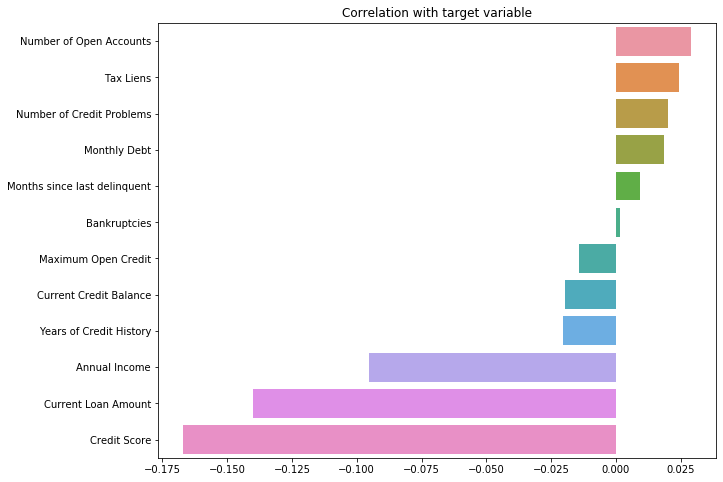

In [15]:
corr_with_target = df[features_names + [target_name]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

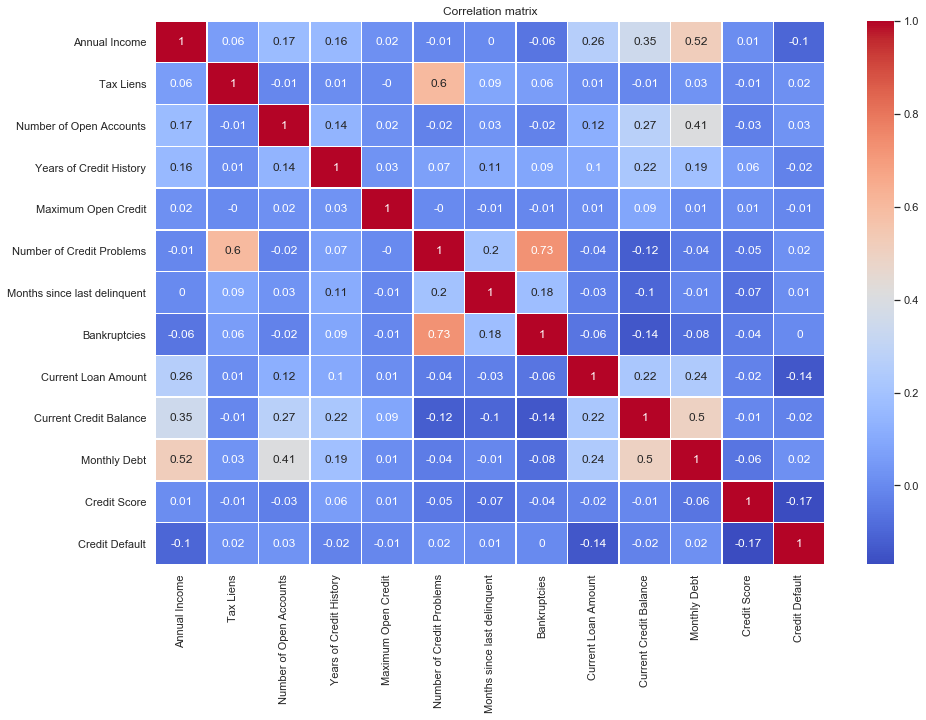

In [16]:
plt.figure(figsize = (15,10))
sns.set(font_scale=1)


corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

**–í—ã–≤–æ–¥—ã –ø–æ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü–µ:**

1. –ù–∞–±–ª—é–¥–∞–µ—Ç—Å—è –Ω–∞–∏–±–æ–ª—å—à–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Ç–∞—Ä–≥–µ—Ç–∞ —Å –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–º Credit Score.
2. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–∏—Ç—É–∞—Ü–∏–π, –∫–æ–≥–¥–∞ –∫–ª–∏–µ–Ω—Ç –æ–±—ä—è–≤–ª—è–µ—Ç –æ –±–∞–Ω–∫—Ä–æ—Ç—Å—Ç–≤–µ, –∫–æ—Ä—Ä–µ–ª–∏—Ä—É–µ—Ç —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ø—Ä–æ–±–ª–µ–º –ø–æ –∫—Ä–µ–¥–∏—Ç—É.
3. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–±–ª–µ–º –ø–æ –∫—Ä–µ–¥–∏—Ç–∞–º, –≤ —Å–≤–æ—é –æ—á–µ—Ä–µ–¥—å, –∫–æ—Ä—Ä–µ–ª–∏—Ä—É–µ—Ç —Å —É—Ä–æ–≤–Ω–µ–º –Ω–∞–ª–æ–≥–æ–≤—ã—Ö –æ–±—Ä–µ–º–µ–Ω–µ–Ω–∏–π.
4. –ú–µ—Å—è—á–Ω—ã–π –¥–æ–ª–≥ –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é —Å –≥–æ–¥–æ–≤—ã–º –¥–æ—Ö–æ–¥–æ–º, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –æ—Ç–∫—Ä—ã—Ç—ã—Ö —Å—á–µ—Ç–æ–≤ –∏ —Ç–µ–∫—É—â–∏–º –æ—Å—Ç–∞—Ç–∫–æ–º –ø–æ –∫—Ä–µ–¥–∏—Ç—É.

#### 6.2 –ü—Ä–æ–≤–µ—Ä–∫–∞ –≥–∏–ø–æ—Ç–µ–∑ –æ –∫–∞—Ç–µ–≥–∏–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö

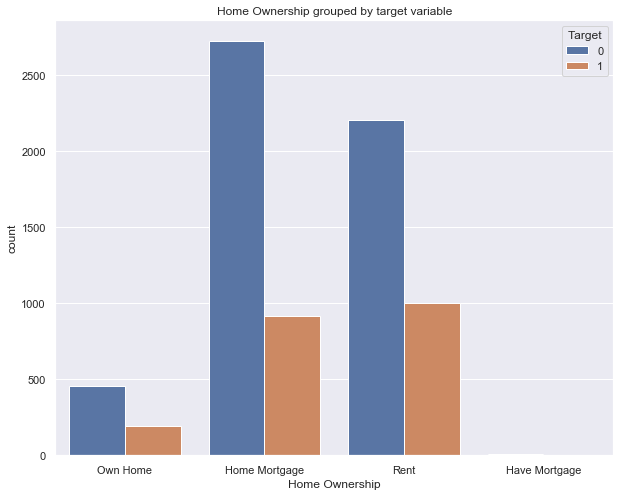

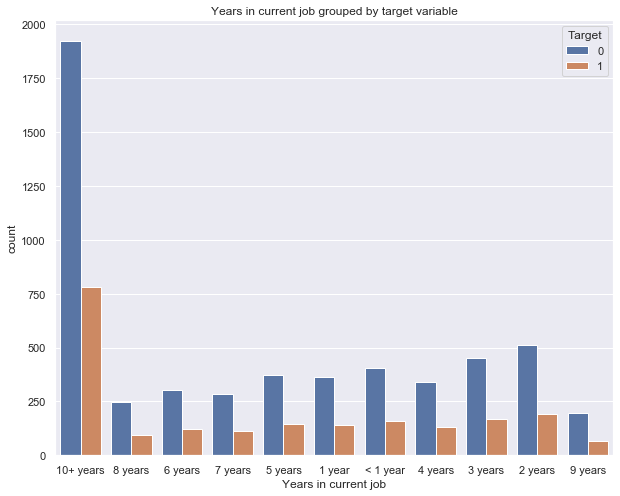

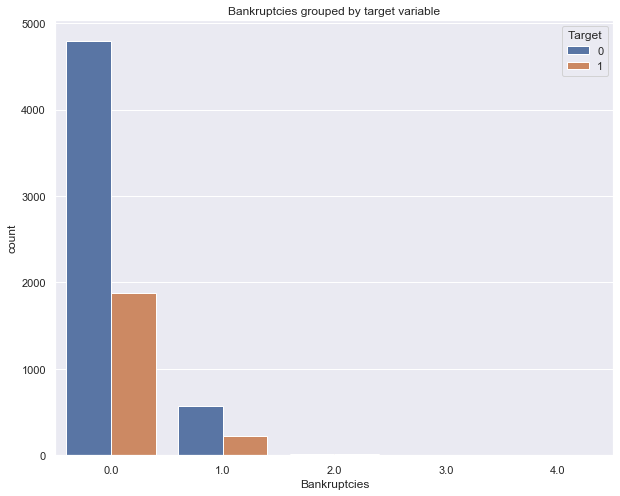

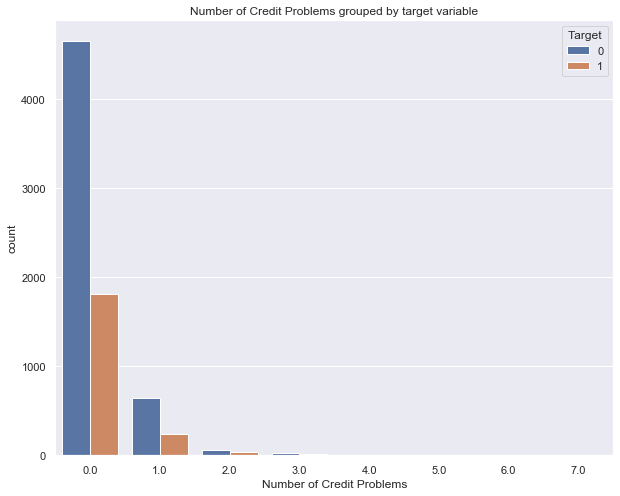

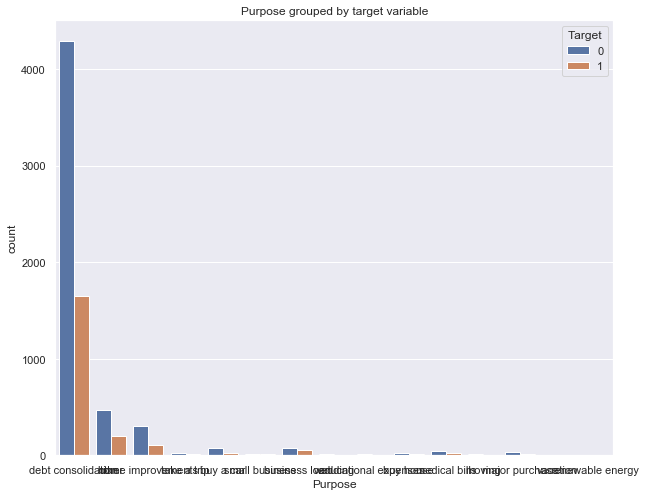

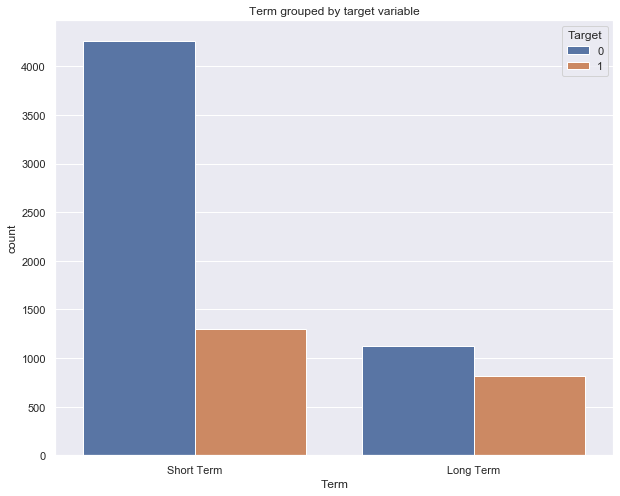

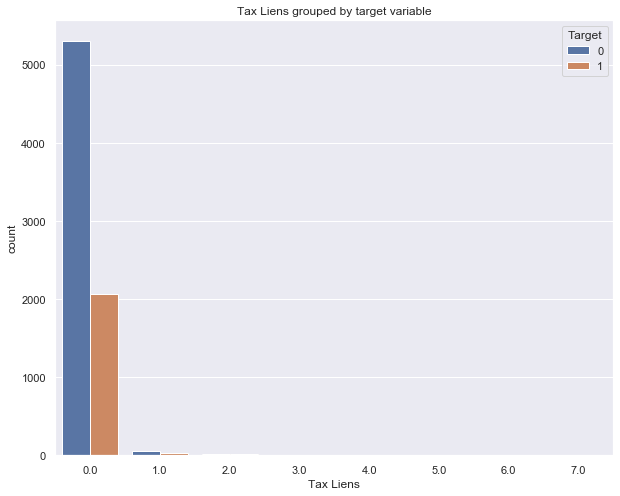

In [17]:
for name in cat_feature_names:

    plt.figure(figsize=(10, 8))

    sns.countplot(x=name, hue=target_name, data=df)
    plt.title(f'{name} grouped by target variable')
    plt.legend(title='Target', loc='upper right')

    plt.show()

In [18]:
def contingency_test(df, feature):
    feat_values = df[feature].unique()

    for item in itertools.combinations(feat_values, 2):
        if df[df[feature]==item[0]].shape[0] < 500 and df[df[feature]==item[1]].shape[0] < 500:
            continue
            
        
        feature_and_target_s = df.loc[df[feature].isin(list(item)), \
                                         [feature, target_name]].sample(500)
        
        feature_and_target_s['id'] = pd.Index(range(500))

        table = feature_and_target_s.pivot_table(values='id', index=feature, columns=target_name, 
                                                        aggfunc='count')
        
        chi2, p, dof, expected = chi2_contingency(table, correction=False)
        
        if p != p: # –µ—Å–ª–∏ nan
            continue
        if p > 0.05:
            print(f'{item}, p={p:.2f}, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã')
#          df.loc[df[feature]==item[0], feature] = item[1]


–ü—Ä–æ–≤–µ—Ä–∏–º –≥–∏–ø–æ—Ç–µ–∑—ã –æ —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏ —á–∞—Å—Ç–æ—Ç –≤ —Ä–∞–∑–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏—è—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

**–ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞:** –æ–∂–∏–¥–∞–µ–º—ã–µ –∏ –Ω–∞–±–ª—é–¥–∞–µ–º—ã–µ —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã

**–ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞:** –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –≤ —á–∞—Å—Ç–æ—Ç–∞—Ö –≤—ã—Ö–æ–¥—è—Ç –∑–∞ —Ä–∞–º–∫–∏ —Å–ª—É—á–∞–π–Ω—ã—Ö –∫–æ–ª–µ–±–∞–Ω–∏–π, —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã

**–ö—Ä–∏—Ç–µ—Ä–∏–π:** –•–∏-–∫–≤–∞–¥—Ä–∞—Ç –ü–∏—Ä—Å–æ–Ω–∞

**–£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏  ùõº :** 0.05

**–ö—Ä–∏—Ç–∏—á–µ—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å:** –¥–≤—É—Ö—Å—Ç–æ—Ä–æ–Ω–Ω—è—è

–ï—Å–ª–∏ p-value –ø–æ–ª—É—á–∏—Ç—Å—è –±–æ–ª—å—à–µ –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ –ø–æ—Ä–æ–≥–∞, —Ç–æ –≥–∏–ø–æ—Ç–µ–∑—É –æ —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏ —á–∞—Å—Ç–æ—Ç –º–æ–∂–Ω–æ –Ω–µ –æ—Ç–±—Ä–∞—Å—ã–≤–∞—Ç—å.

In [19]:
for col in cat_feature_names:
    print(f'---------------------------{col}--------------------')
    contingency_test(df, col)

---------------------------Home Ownership--------------------
('Own Home', 'Home Mortgage'), p=0.09, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
('Own Home', 'Rent'), p=0.58, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
('Own Home', 'Have Mortgage'), p=0.65, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
('Home Mortgage', 'Rent'), p=0.16, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
---------------------------Years in current job--------------------
('10+ years', '8 years'), p=0.47, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
('10+ years', '6 years'), p=0.49, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
('10+ years', '7 years'), p=0.06, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
('10+ years', '5 years'), p=0.93, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
('10+ years', '1 year'), p=0.75, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
('10+ years', '< 1 year'), p=0.92, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
('10+ years', '4 years'), p=0.36, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/contingency.py:244: RuntimeWarning: invalid value encountered in less
  if np.any(observed < 0):


('10+ years', '3 years'), p=0.34, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
('10+ years', '2 years'), p=0.13, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
('10+ years', '9 years'), p=0.17, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
('8 years', '5 years'), p=0.97, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
('8 years', '1 year'), p=0.59, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
('8 years', '< 1 year'), p=0.78, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
('8 years', '3 years'), p=0.99, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
('8 years', '2 years'), p=0.66, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
('6 years', '5 years'), p=0.45, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
('6 years', '1 year'), p=0.85, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
('6 years', '< 1 year'), p=0.28, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
('6 years', '3 years'), p=0.63, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
('6 years', '2 years'), p=0.67, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
('7 years', '5 years'), p=0.29, —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
('7 years', '1

**–í—ã–≤–æ–¥:** –≤—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫—Ä–æ–º–µ Term, –Ω–µ –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É—é—Ç –±–æ–ª—å—à–æ–≥–æ –≤–ª–∏—è–Ω–∏—è –Ω–∞ —Ç–∞—Ä–≥–µ—Ç.

#### 6.3 –ü—Ä–æ–≤–µ—Ä–∫–∞ –≥–∏–ø–æ—Ç–µ–∑ –æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö

In [20]:
def dist_checker(df, feature):

    
    feature_with_target_s = df[[feature, target_name]].sample(1000)
    feature_s = feature_with_target_s[feature]
    feature_target_0 = feature_s[feature_with_target_s[target_name] == 0]
    feature_target_1 = feature_s[feature_with_target_s[target_name] == 1]
    norm_test = shapiro(feature_s)[1]
    # –ø—Ä–æ–≤–µ—Ä—è–µ–º –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å
    if norm_test > 0.05:
        print('Distribution is normal')
    else:
        print('Distribution is not normal')
        u_test = mannwhitneyu(feature_target_0, feature_target_1)[1]
        if u_test > 0.05:
            print('H0 –Ω–µ–ª—å–∑—è –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å, —Å—á–∏—Ç–∞–µ–º, —á—Ç–æ –º–∞—Ç.–æ–∂–∏–¥–∞–Ω–∏—è —Ä–∞–≤–Ω—ã')
        else:
            print('H0 –Ω–µ–ª—å–∑—è –ø—Ä–∏–Ω—è—Ç—å, —Å—á–∏—Ç–∞–µ–º, —á—Ç–æ –º–∞—Ç.–æ–∂–∏–¥–∞–Ω–∏—è –Ω–µ —Ä–∞–≤–Ω—ã')
            

    fig, axes = plt.subplots(1, 2, figsize=(20, 6))

    sns.kdeplot(feature_target_0, shade=True, label='No default', color='g', ax=axes[0])
    sns.kdeplot(feature_target_1, shade=True, label='Default', color='r', ax=axes[0])
    plt.xlabel(f'{feature}')
    plt.title(f'{feature} distribution grouped by target variable')
    
    
    sns.pointplot(x=target_name, y=feature, data=feature_with_target_s, capsize=.1, ax=axes[1])
    plt.title(f'Confidence intervals (95 %) for {feature}')

    
    
    plt.show()

–ü—Ä–æ–≤–µ—Ä–∏–º —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∑–Ω–∞—á–µ–Ω–∏—è —Ç–∞—Ä–≥–µ—Ç–∞.

**–ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞:** —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –¥–≤—É—Ö –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –≤—ã–±–æ—Ä–∫–∞—Ö —Ä–∞–≤–Ω—ã

**–ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞:** —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –¥–≤—É—Ö –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –≤—ã–±–æ—Ä–∫–∞—Ö —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è

**–ö—Ä–∏—Ç–µ—Ä–∏–π:** –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ –ø—Ä–∏ –ø–æ–º–æ—â–∏ –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞, –¥–∞–ª–µ–µ –≤ —Å–ª—É—á–∞–µ –Ω–µ–Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–π –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏

**–£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏**  ùõº : 0.05

**–ö—Ä–∏—Ç–∏—á–µ—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å:** –¥–≤—É—Ö—Å—Ç–æ—Ä–æ–Ω–Ω—è—è


---------------------------Annual Income--------------------
Distribution is not normal
H0 –Ω–µ–ª—å–∑—è –ø—Ä–∏–Ω—è—Ç—å, —Å—á–∏—Ç–∞–µ–º, —á—Ç–æ –º–∞—Ç.–æ–∂–∏–¥–∞–Ω–∏—è –Ω–µ —Ä–∞–≤–Ω—ã


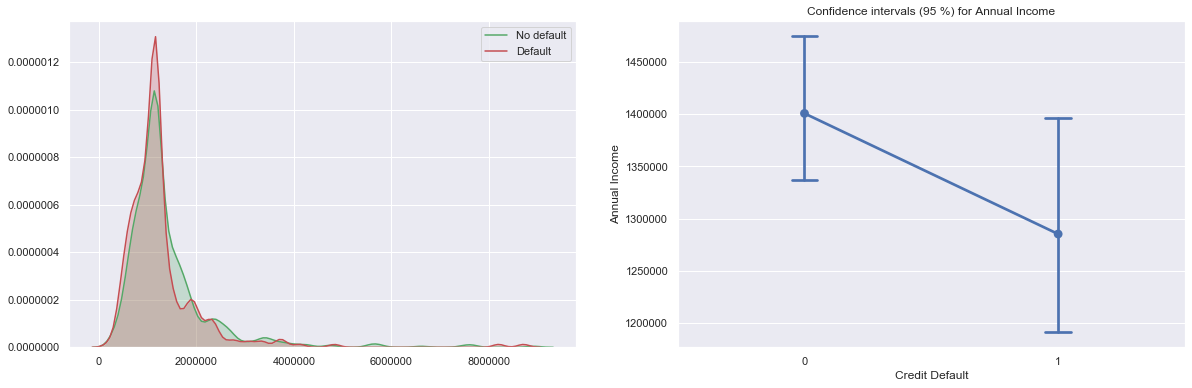

---------------------------Number of Open Accounts--------------------
Distribution is not normal
H0 –Ω–µ–ª—å–∑—è –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å, —Å—á–∏—Ç–∞–µ–º, —á—Ç–æ –º–∞—Ç.–æ–∂–∏–¥–∞–Ω–∏—è —Ä–∞–≤–Ω—ã


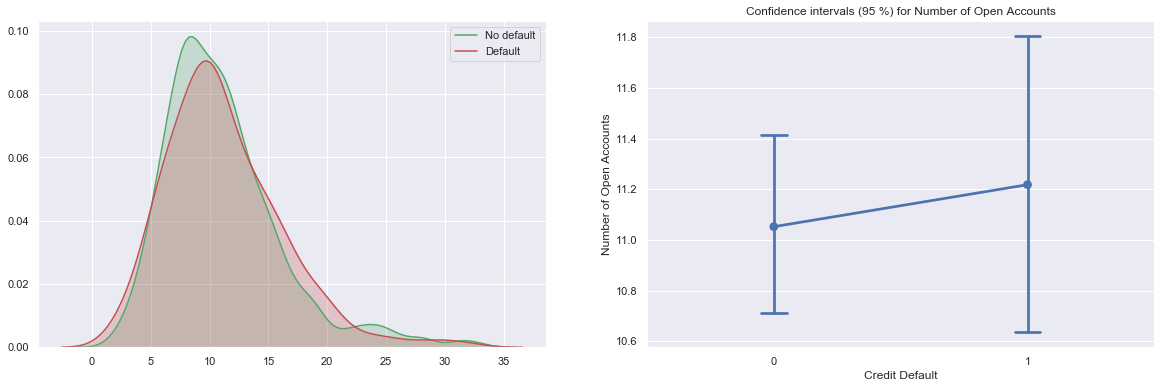

---------------------------Years of Credit History--------------------
Distribution is not normal
H0 –Ω–µ–ª—å–∑—è –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å, —Å—á–∏—Ç–∞–µ–º, —á—Ç–æ –º–∞—Ç.–æ–∂–∏–¥–∞–Ω–∏—è —Ä–∞–≤–Ω—ã


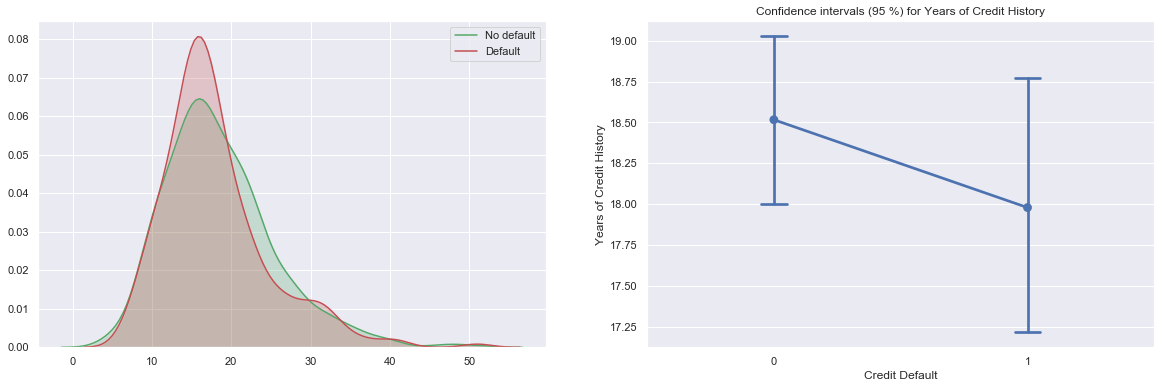

---------------------------Maximum Open Credit--------------------
Distribution is not normal
H0 –Ω–µ–ª—å–∑—è –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å, —Å—á–∏—Ç–∞–µ–º, —á—Ç–æ –º–∞—Ç.–æ–∂–∏–¥–∞–Ω–∏—è —Ä–∞–≤–Ω—ã


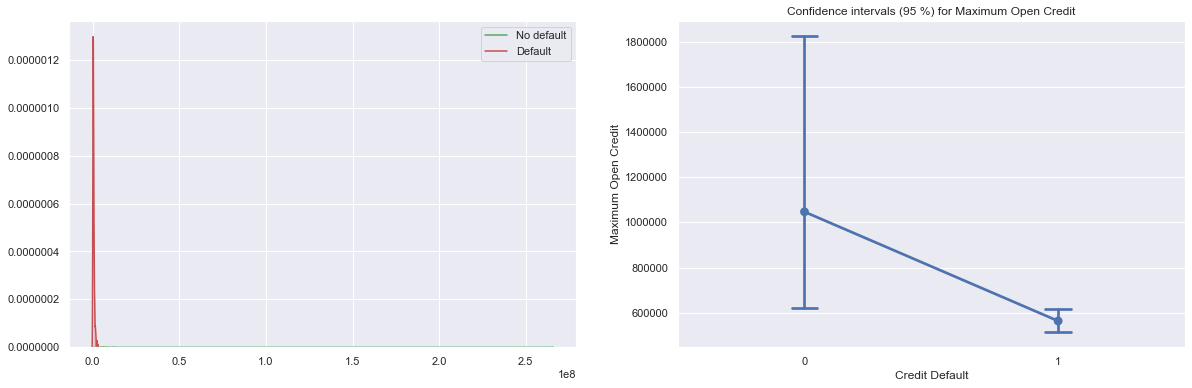

---------------------------Months since last delinquent--------------------
Distribution is not normal
H0 –Ω–µ–ª—å–∑—è –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å, —Å—á–∏—Ç–∞–µ–º, —á—Ç–æ –º–∞—Ç.–æ–∂–∏–¥–∞–Ω–∏—è —Ä–∞–≤–Ω—ã


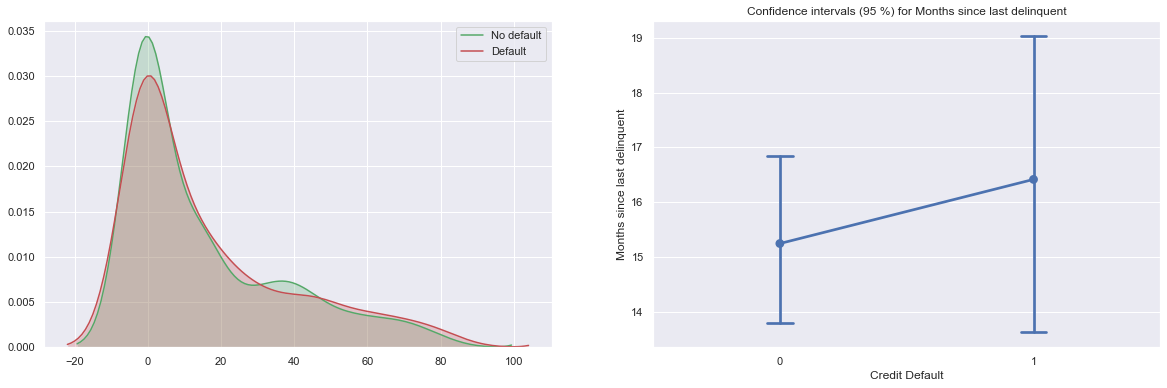

---------------------------Current Loan Amount--------------------
Distribution is not normal
H0 –Ω–µ–ª—å–∑—è –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å, —Å—á–∏—Ç–∞–µ–º, —á—Ç–æ –º–∞—Ç.–æ–∂–∏–¥–∞–Ω–∏—è —Ä–∞–≤–Ω—ã


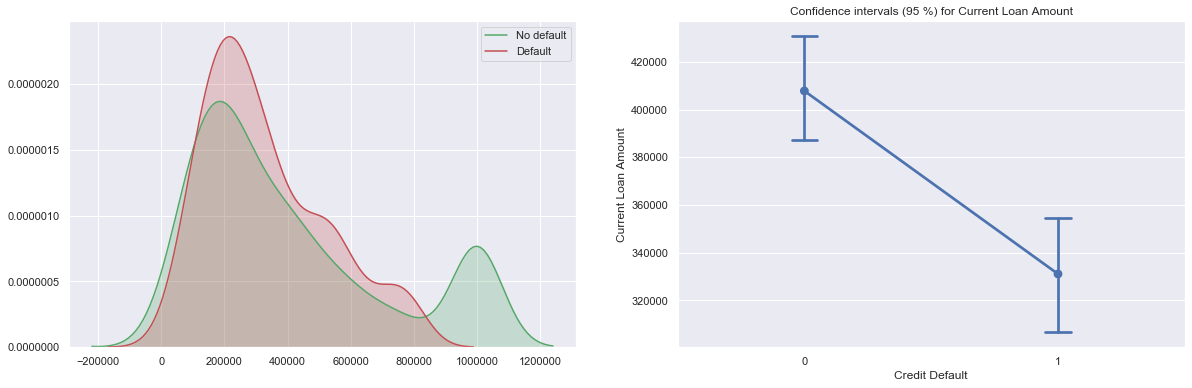

---------------------------Current Credit Balance--------------------
Distribution is not normal
H0 –Ω–µ–ª—å–∑—è –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å, —Å—á–∏—Ç–∞–µ–º, —á—Ç–æ –º–∞—Ç.–æ–∂–∏–¥–∞–Ω–∏—è —Ä–∞–≤–Ω—ã


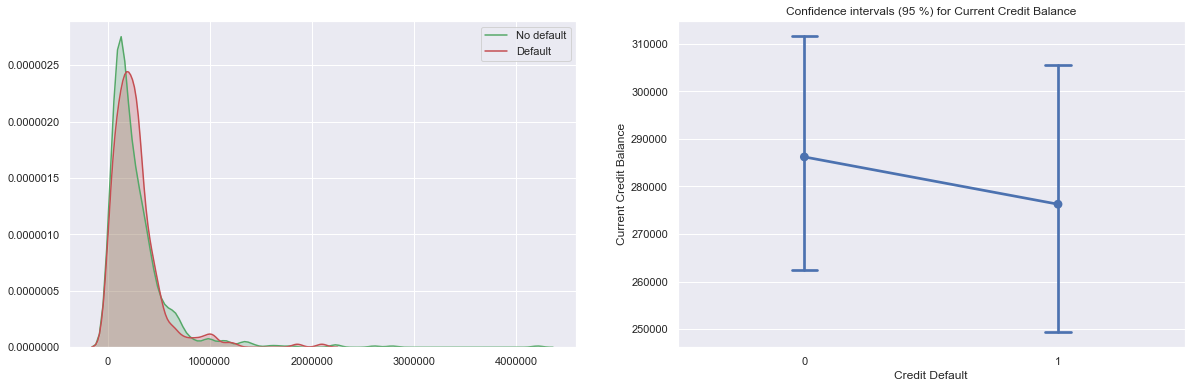

---------------------------Monthly Debt--------------------
Distribution is not normal
H0 –Ω–µ–ª—å–∑—è –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å, —Å—á–∏—Ç–∞–µ–º, —á—Ç–æ –º–∞—Ç.–æ–∂–∏–¥–∞–Ω–∏—è —Ä–∞–≤–Ω—ã


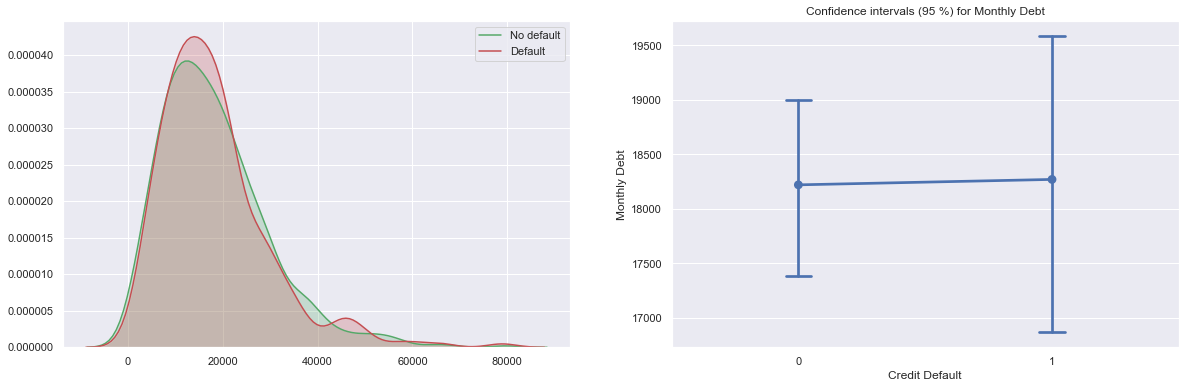

---------------------------Credit Score--------------------
Distribution is not normal
H0 –Ω–µ–ª—å–∑—è –ø—Ä–∏–Ω—è—Ç—å, —Å—á–∏—Ç–∞–µ–º, —á—Ç–æ –º–∞—Ç.–æ–∂–∏–¥–∞–Ω–∏—è –Ω–µ —Ä–∞–≤–Ω—ã


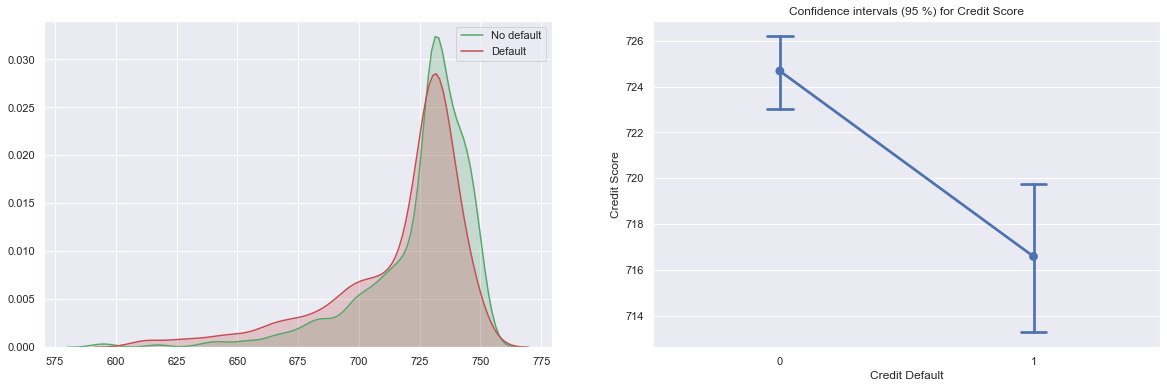

In [21]:
for col in num_feature_names:
    print(f'---------------------------{col}--------------------')
    dist_checker(df, col)
    

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∞ –ú–∞–Ω–∞-–£–∏—Ç–Ω–∏ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞—é—Ç—Å—è –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–º–∏ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞–º–∏. –í —Å–ª—É—á–∞–µ–º –∏—Ö –Ω–µ–ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏—è, H0 –Ω–µ–ª—å–∑—è –ø—Ä–∏–Ω—è—Ç—å, —Å—á–∏—Ç–∞–µ–º, —á—Ç–æ –º–∞—Ç.–æ–∂–∏–¥–∞–Ω–∏—è –≤—ã–±–æ—Ä–æ–∫ –ø—Ä–∏–∑–Ω–∞–∫–∞ —Å–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø–æ –∑–Ω–∞—á–µ–Ω–∏—é —Ç–∞—Ä–≥–µ—Ç–∞ –Ω–µ —Ä–∞–≤–Ω—ã. –≠—Ç–æ —Å–ø—Ä–∞–≤–µ–¥–ª–∏–≤–æ –¥–ª—è –ü—Ä–∏–∑–Ω–∞–∫–æ–≤ Annual Income, Maximum Open Credit, Current Loan Amount, Credit Score, –ø–æ—ç—Ç–æ–º—É –º–æ–∂–µ–º –∏—Ö —Å—á–∏—Ç–∞—Ç—å –Ω–∞–∏–±–æ–ª–µ–µ –∑–Ω–∞—á–∏–º—ã–º–∏ –¥–ª—è –º–æ–¥–µ–ª–∏.

### 7. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∫ –æ–±—É—á–µ–Ω–∏—é

In [22]:
class FeatureGenetator():
    """–ì–µ–Ω–µ—Ä–∞—Ü–∏—è –Ω–æ–≤—ã—Ö —Ñ–∏—á"""
    
    def __init__(self):
        self.binary_to_numbers = None
        
    def fit(self, X, y=None):
        X = X.copy()
        # –ë–∏–Ω–∞—Ä–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∑–∞–º–µ–Ω—è–µ–º –Ω–∞ 0 –∏ 1
        self.binary_to_numbers = {'Short Term': 0, 'Long Term': 1}
        
        
    def transform(self, X):
        # –ë–∏–Ω–∞—Ä–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
        X['Term'] = X['Term'].map(self.binary_to_numbers)
        X = self.years_job_int(X)
           
        return X
    
    @staticmethod
    def years_job_int(X):
        X['Years_in_cur_job_int'] = 10
        
        X.loc[X['Years in current job'] == '< 1 year', 'Years_in_cur_job_int'] = 0  
        X.loc[X['Years in current job'] == '1 year', 'Years_in_cur_job_int'] = 1
        X.loc[X['Years in current job'] == '2 years', 'Years_in_cur_job_int'] = 2  
        X.loc[X['Years in current job'] == '3 years', 'Years_in_cur_job_int'] = 3
        X.loc[X['Years in current job'] == '4 years', 'Years_in_cur_job_int'] = 4 
        X.loc[X['Years in current job'] == '5 years', 'Years_in_cur_job_int'] = 5
        X.loc[X['Years in current job'] == '6 years', 'Years_in_cur_job_int'] = 6
        X.loc[X['Years in current job'] == '7 years', 'Years_in_cur_job_int'] = 7 
        X.loc[X['Years in current job'] == '8 years', 'Years_in_cur_job_int'] = 8
        X.loc[X['Years in current job'] == '9 years', 'Years_in_cur_job_int'] = 9 
        X.loc[X['Years in current job'] == '10+ years', 'Years_in_cur_job_int'] = 10 
        
        return X    

In [23]:
def get_classification_report(model, X_test, y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))
    plot_precision_recall_curve(model, X_test, y_test_true)

In [24]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [25]:
# –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç (–¥–æ–±–∞–≤–ª—è–µ–º –Ω–æ–≤—ã–µ –∫–æ–ª–æ–Ω–∫–∏)
features = FeatureGenetator()

features.fit(df)

df = features.transform(df)

### 8. –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –º–æ–¥–µ–ª–∏

#### –£–ª—É—á—à–µ–Ω–∏–µ —Ä–∞–±–æ—Ç—ã —Å –∫–∞—Ç. –ø—Ä–∏–∑–Ω–∞–∫–∏

In [26]:
df['Bankruptcies'] = df['Bankruptcies'].astype(int)
df['Tax Liens'] = df['Tax Liens'].astype(int)
df['Number of Credit Problems'] = df['Number of Credit Problems'].astype(int)

In [27]:
new_num_cat = ['Home Ownership', 'Purpose', 'Years_in_cur_job_int','Number of Credit Problems', 
               'Term', 'Bankruptcies', 'Tax Liens']

In [28]:
for colname in new_num_cat:
    df[colname] = pd.Categorical(df[colname])
    
df[new_num_cat].dtypes

Home Ownership               category
Purpose                      category
Years_in_cur_job_int         category
Number of Credit Problems    category
Term                         category
Bankruptcies                 category
Tax Liens                    category
dtype: object

In [29]:
y = df[target_name]
X = df[df.columns.drop(target_name).tolist()]

In [30]:
selected_feature_names = num_feature_names + new_num_cat
X = X[selected_feature_names]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=21)

In [32]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, target_name)
    
df_balanced[target_name].value_counts()

0    3771
1    2958
Name: Credit Default, dtype: int64

In [33]:
X_train = df_balanced.drop(columns=target_name)
y_train = df_balanced[target_name]

In [34]:
# —Å–ø–∏—Å–æ–∫ –∫–∞—Ç. –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö 
cat_features = []
for col in new_num_cat:
    cat_features.append(X_train.columns.get_loc(col))
cat_features

[9, 10, 11, 12, 13, 14, 15]

TRAIN

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3771
           1       0.84      0.83      0.83      2958

    accuracy                           0.85      6729
   macro avg       0.85      0.85      0.85      6729
weighted avg       0.85      0.85      0.85      6729

TEST

              precision    recall  f1-score   support

           0       0.80      0.75      0.78      1616
           1       0.45      0.52      0.48       634

    accuracy                           0.69      2250
   macro avg       0.63      0.64      0.63      2250
weighted avg       0.70      0.69      0.69      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1220  396
1                307  327


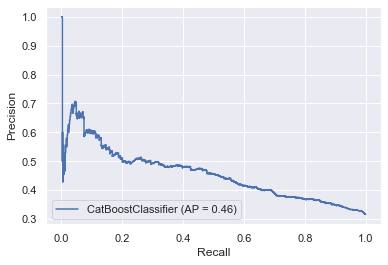

In [35]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)
model_catb.fit(X_train, y_train, cat_features=cat_features)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

get_classification_report(model_catb, X_test, y_train, y_train_pred, y_test, y_test_pred)

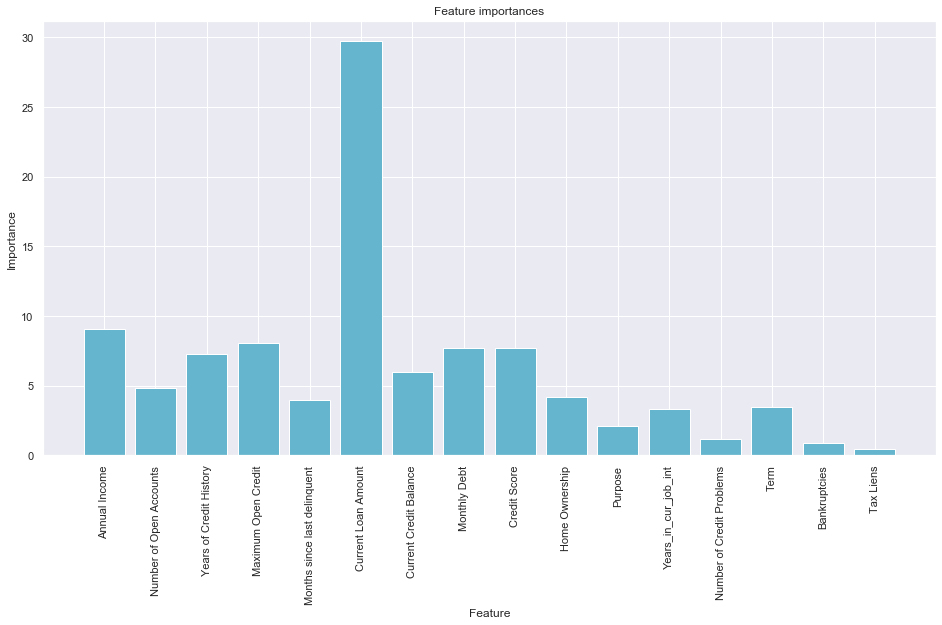

In [36]:
importances = model_catb.feature_importances_
plt.figure(figsize = [16, 8])
plt.bar(X.columns, importances, color='c')
plt.title('Feature importances')
plt.xlabel('Feature')
plt.xticks(rotation = 90)
plt.ylabel('Importance')
plt.show()

#### –ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

In [37]:
params = {'n_estimators':[50, 100, 200, 500, 700, 1000, 1200, 1500],
          'max_depth':[3, 5, 7]}

cv=KFold(n_splits=3, random_state=21, shuffle=True)

In [38]:
# %%time

# gscv = GridSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
# gscv.fit(X, y, cat_features=cat_features)

# gscv.best_params_

TRAIN

              precision    recall  f1-score   support

           0       0.81      0.62      0.70      3771
           1       0.63      0.82      0.71      2958

    accuracy                           0.71      6729
   macro avg       0.72      0.72      0.71      6729
weighted avg       0.73      0.71      0.71      6729

TEST

              precision    recall  f1-score   support

           0       0.84      0.55      0.67      1616
           1       0.39      0.74      0.51       634

    accuracy                           0.60      2250
   macro avg       0.62      0.65      0.59      2250
weighted avg       0.72      0.60      0.62      2250

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               890  726
1               165  469
CPU times: user 45.4 s, sys: 4.13 s, total: 49.5 s
Wall time: 18.6 s


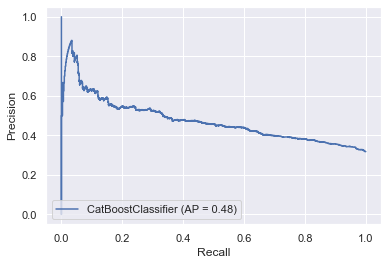

In [39]:
%%time

final_model = catb.CatBoostClassifier(n_estimators=1000, max_depth=7, class_weights=[0.43, 0.56],
                                      silent=True, random_state=21, l2_leaf_reg=1000)

final_model.fit(X_train, y_train, cat_features=cat_features)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)
y_test_pred_probs = final_model.predict_proba(X_test)

get_classification_report(final_model, X_test, y_train, y_train_pred, y_test, y_test_pred)

In [40]:
def show_learning_curve_plot(estimator, X, y, cv=3, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, 
                                                            cv=cv, 
                                                            scoring='f1',
                                                            train_sizes=train_sizes, 
                                                            n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(15,8))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.title(f"Learning curves ({type(estimator).__name__})")
    plt.xlabel("Training examples")
    plt.ylabel("Score")     
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [42]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 9):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

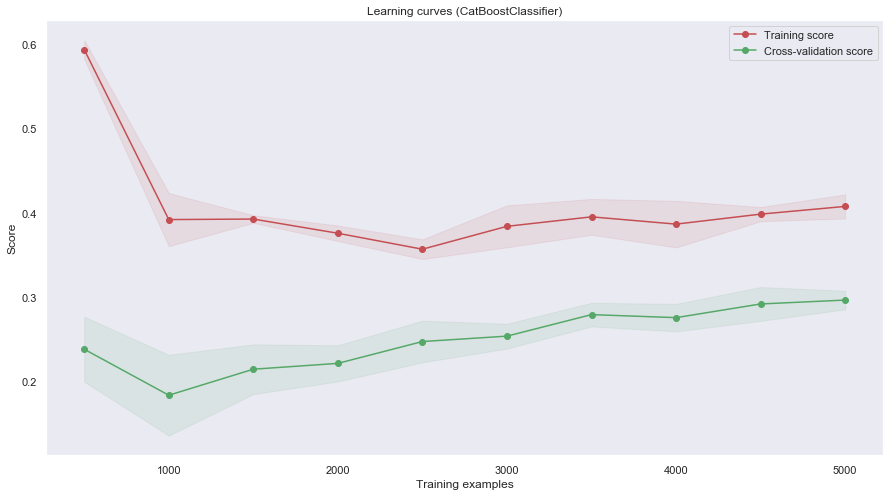

In [41]:
show_learning_curve_plot(final_model, X[num_feature_names], y)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


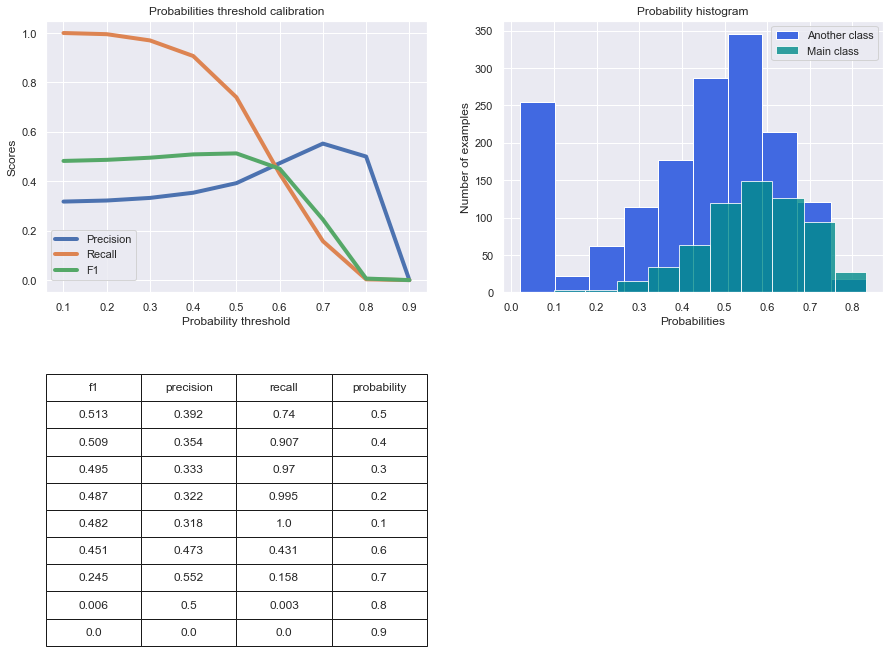

In [43]:
show_proba_calibration_plots(y_test_pred_probs[:, 1], y_test)

### 9. –ò—Ç–æ–≥–æ–≤–æ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ

In [59]:
X_final = pd.read_csv(test_path)
preds_final = pd.DataFrame()

In [60]:
# –æ—á–∏—â–∞–µ–º –∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞–µ–º —Ñ–∏–Ω–∞–ª—å–Ω—ã–π –¥–∞–∞—Ç—Å–µ—Ç
y = df[target_name]
X = df[df.columns.drop(target_name).tolist()]

imputer = FeatureImputer()
imputer.fit(X)
X_final = imputer.transform(X_final)

features = FeatureGenetator()
features.fit(X)
X_final = features.transform(X_final)

X_final = X_final[selected_feature_names]
X = X[selected_feature_names]

In [61]:
X_final['Number of Credit Problems'] = X_final['Number of Credit Problems'].astype(int)
X_final['Bankruptcies'] = X_final['Bankruptcies'].astype(int)
X_final['Tax Liens'] = X_final['Tax Liens'].astype(int)

In [62]:
for colname in new_num_cat:
    X_final[colname] = pd.Categorical(X_final[colname])
    
X_final[new_num_cat].dtypes

Home Ownership               category
Purpose                      category
Years_in_cur_job_int         category
Number of Credit Problems    category
Term                         category
Bankruptcies                 category
Tax Liens                    category
dtype: object

In [63]:
final_model = catb.CatBoostClassifier(n_estimators=1000, max_depth=7,
                                      silent=True, random_state=21, l2_leaf_reg=1000)

final_model.fit(X, y, cat_features=cat_features)

In [64]:
decisions = final_model.predict(X_final)
preds_final['Credit Dafault'] = decisions
preds_final.to_csv('APlavina_predictions.csv')

preds_final['Credit Dafault'].value_counts()

0    2334
1     166
Name: Credit Dafault, dtype: int64

In [65]:
preds_final.head(5)

Credit Dafault
0               0
1               0
2               0
3               0
4               0